<a href="https://colab.research.google.com/github/la2015-hw/Group_10/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello World")
print("testing again")

Hello World
testing again


In [ ]:
print("Group 10")

Group 10


In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/zoo2MainSpecz.csv')
df.head()

,specobjid,dr8objid,dr7objid,ra,dec,rastring,decstring,sample,gz2class,total_classifications,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,1.802675e+18,NaN,588017703996096547,160.99040,11.703790,10:43:57.70,+11:42:13.6,original,SBb?t,44,...,0.225,0.225,0.225,0,10,10.0,0.250,0.250,0.250,0
1,1.992984e+18,NaN,587738569780428805,192.41083,15.164207,12:49:38.60,+15:09:51.1,original,Ser,45,...,0.000,0.000,0.000,0,0,0.0,0.000,0.000,0.000,0
2,1.489569e+18,NaN,587735695913320507,210.80220,54.348953,14:03:12.53,+54:20:56.2,original,Sc+t,46,...,0.651,0.651,0.651,0,3,3.0,0.070,0.070,0.070,0
3,2.924084e+18,1.237668e+18,587742775634624545,185.30342,18.382704,12:21:12.82,+18:22:57.7,original,SBc(r),45,...,0.071,0.071,0.071,0,6,6.0,0.429,0.429,0.429,0
4,1.387165e+18,1.237658e+18,587732769983889439,187.36679,8.749928,12:29:28.03,+08:44:59.7,extra,Ser,49,...,0.000,0.000,0.000,0,1,1.0,1.000,1.000,1.000,0


In [4]:
print("Shape:", df.shape)
print(df.isna().sum().sort_values(ascending=False).head(20))

Shape: (243500, 233)
dr8objid                                                3752
specobjid                                                 14
dr7objid                                                   0
ra                                                         0
dec                                                        0
rastring                                                   0
decstring                                                  0
sample                                                     0
gz2class                                                   0
total_classifications                                      0
total_votes                                                0
t01_smooth_or_features_a01_smooth_count                    0
t01_smooth_or_features_a01_smooth_weight                   0
t01_smooth_or_features_a01_smooth_fraction                 0
t01_smooth_or_features_a01_smooth_weighted_fraction        0
t01_smooth_or_features_a01_smooth_debiased                 0
t01

In [7]:
target_cols = [c for c in df.columns if c.endswith("_fraction")]

selected_targets = [
    't01_smooth_or_features_a01_smooth_fraction',
    't01_smooth_or_features_a02_features_or_disk_fraction',
    't02_edgeon_a04_yes_fraction',
    't02_edgeon_a05_no_fraction',
    't03_bar_a06_bar_fraction',
    't04_spiral_a08_spiral_fraction',
    't05_bulge_prominence_a10_no_bulge_fraction',
    't05_bulge_prominence_a11_just_noticeable_fraction',
    't05_bulge_prominence_a12_obvious_fraction',
    't05_bulge_prominence_a13_dominant_fraction'
]

In [10]:
list(df.columns)

['specobjid',
 'dr8objid',
 'dr7objid',
 'ra',
 'dec',
 'rastring',
 'decstring',
 'sample',
 'gz2class',
 'total_classifications',
 'total_votes',
 't01_smooth_or_features_a01_smooth_count',
 't01_smooth_or_features_a01_smooth_weight',
 't01_smooth_or_features_a01_smooth_fraction',
 't01_smooth_or_features_a01_smooth_weighted_fraction',
 't01_smooth_or_features_a01_smooth_debiased',
 't01_smooth_or_features_a01_smooth_flag',
 't01_smooth_or_features_a02_features_or_disk_count',
 't01_smooth_or_features_a02_features_or_disk_weight',
 't01_smooth_or_features_a02_features_or_disk_fraction',
 't01_smooth_or_features_a02_features_or_disk_weighted_fraction',
 't01_smooth_or_features_a02_features_or_disk_debiased',
 't01_smooth_or_features_a02_features_or_disk_flag',
 't01_smooth_or_features_a03_star_or_artifact_count',
 't01_smooth_or_features_a03_star_or_artifact_weight',
 't01_smooth_or_features_a03_star_or_artifact_fraction',
 't01_smooth_or_features_a03_star_or_artifact_weighted_fractio

In [11]:
feature_cols = ['specobjid', 'ra', 'dec']
df_small = df[feature_cols + selected_targets]

df_small.head()

,specobjid,ra,dec,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a02_features_or_disk_fraction,t02_edgeon_a04_yes_fraction,t02_edgeon_a05_no_fraction,t03_bar_a06_bar_fraction,t04_spiral_a08_spiral_fraction,t05_bulge_prominence_a10_no_bulge_fraction,t05_bulge_prominence_a11_just_noticeable_fraction,t05_bulge_prominence_a12_obvious_fraction,t05_bulge_prominence_a13_dominant_fraction
0,1.802675e+18,160.99040,11.703790,0.023,0.955,0.000,1.000,0.571,0.952,0.048,0.190,0.595,0.167
1,1.992984e+18,192.41083,15.164207,0.111,0.844,0.919,0.081,1.000,0.333,0.333,0.333,0.000,0.333
2,1.489569e+18,210.80220,54.348953,0.000,0.957,0.023,0.977,0.093,1.000,0.023,0.419,0.419,0.140
3,2.924084e+18,185.30342,18.382704,0.178,0.822,0.162,0.838,0.677,0.433,0.258,0.484,0.065,0.194
4,1.387165e+18,187.36679,8.749928,0.245,0.735,0.917,0.083,0.333,0.333,0.000,0.667,0.333,0.000


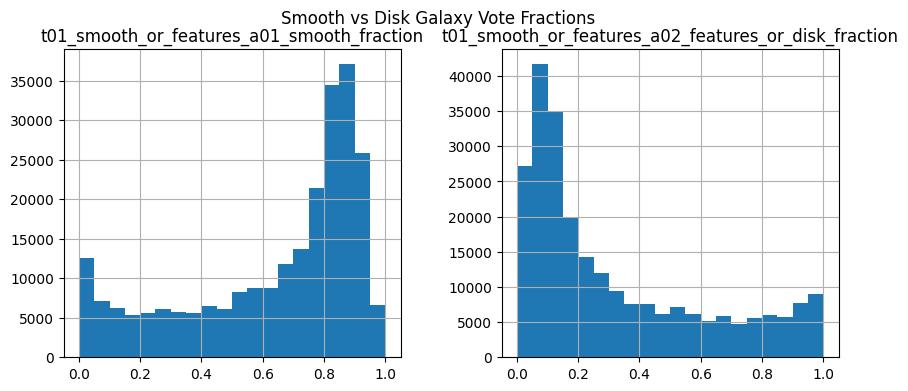

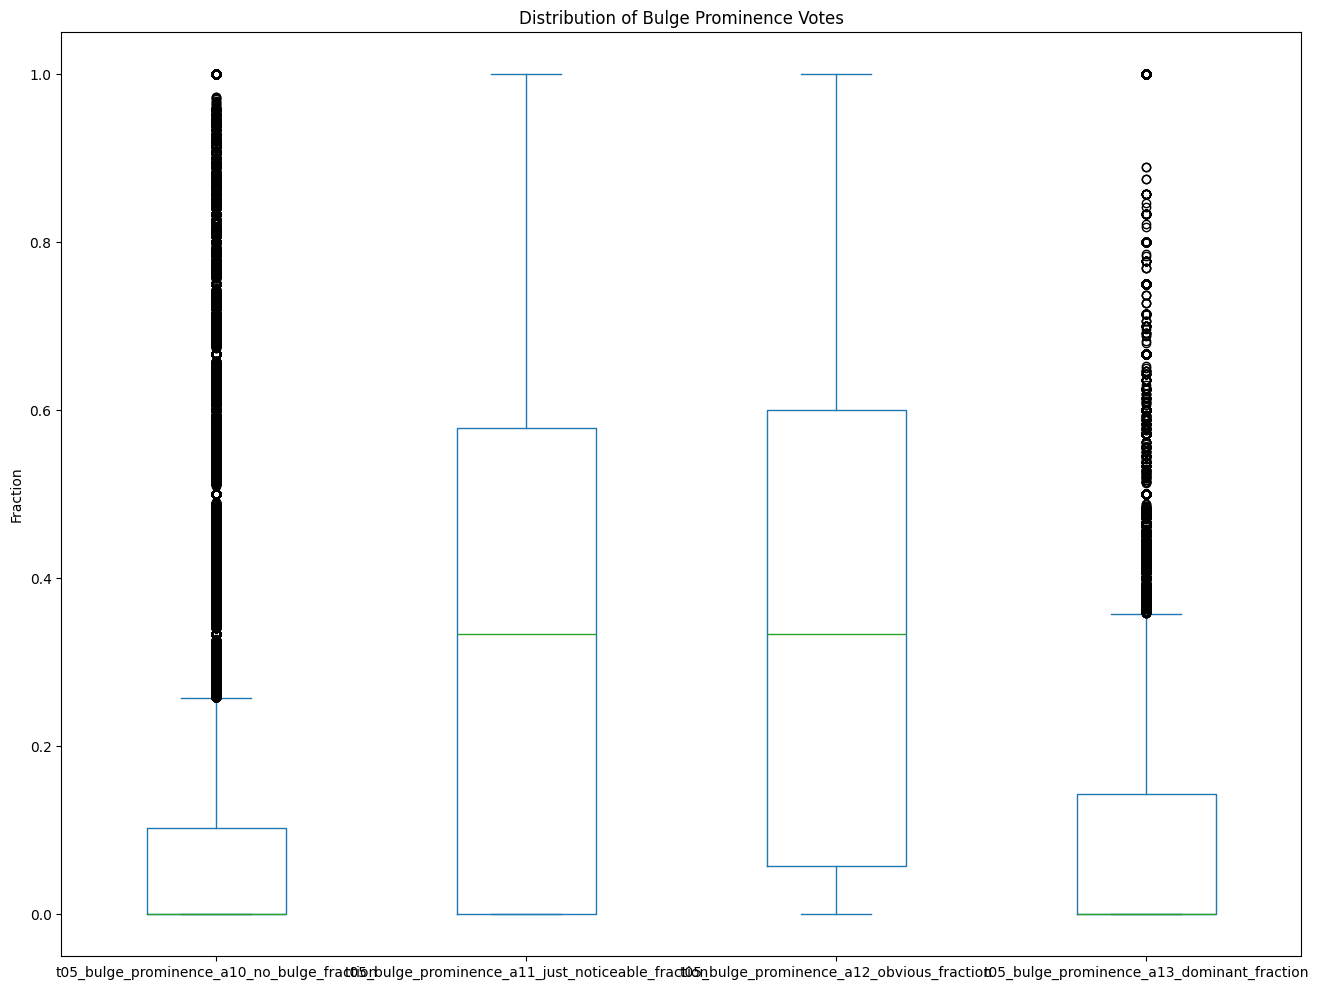

In [15]:
import matplotlib.pyplot as plt

# Smooth vs disk
df_small[['t01_smooth_or_features_a01_smooth_fraction',
          't01_smooth_or_features_a02_features_or_disk_fraction']].hist(bins=20, figsize=(10,4))
plt.suptitle("Smooth vs Disk Galaxy Vote Fractions")
plt.show()

# Bulge prominence categories
df_small[['t05_bulge_prominence_a10_no_bulge_fraction',
          't05_bulge_prominence_a11_just_noticeable_fraction',
          't05_bulge_prominence_a12_obvious_fraction',
          't05_bulge_prominence_a13_dominant_fraction']].plot(kind="box", figsize=(16,12))
plt.title("Distribution of Bulge Prominence Votes")
plt.ylabel("Fraction")
plt.show()

“We extracted ~11 morphology vote fractions from Galaxy Zoo 2, representing smoothness, disk presence, spiral features, and bulge prominence.”

“These will form the target labels for our morphology classification task.”

“Later, we’ll enrich this dataset with redshift and extinction features from SDSS.”